## Week 5 

### Problem-01:

Consider the two dimensional patterns

(2, 1), (3, 5), (4, 3), (5, 6), (6, 7), (7, 8).

Compute the principal component using PCA Algorithm.

#### Step-01:

In [120]:
import numpy as np
x1 = np.array([2,1]).T
x2 = np.array([3,5]).T
x3 = np.array([4,3]).T
x4 = np.array([5,6]).T
x5 = np.array([6,7]).T
x6 = np.array([7,8])
# Find mean of all
x_ = (x1+x2+x3+x4+x5+x6)/6
print('Mean vector is ', x_)
print('X_1: ',x_[0])
print('X_2: ',x_[1])

Mean vector is  [4.5 5. ]
X_1:  4.5
X_2:  5.0


#### Step-3

Subtract mean vector (
¯
x
) or (µ) from the given feature vectors.

x1 – µ = (2 – 4.5, 1 – 5) = (-2.5, -4)

x2 – µ = (3 – 4.5, 5 – 5) = (-1.5, 0)

x3 – µ = (4 – 4.5, 3 – 5) = (-0.5, -2)

x4 – µ = (5 – 4.5, 6 – 5) = (0.5, 1)

x5 – µ = (6 – 4.5, 7 – 5) = (1.5, 2)

x6 – µ = (7 – 4.5, 8 – 5) = (2.5, 3)

In [122]:
# horizontal
px1 = x1 - x_
px2 = x2 - x_
px3 = x3 - x_
px4 = x4 - x_
px5 = x5 - x_ 
px6 = x6 - x_

# vertical
px1t = px1[:,None]
px2t = px2[:,None]
px3t = px3[:,None]
px4t = px4[:,None] 
px5t = px5[:,None] 
px6t = px6[:,None]

# horizontal
print(px1)
print(px2)
print(px3)
print(px4)
print(px5)
print(px6)


# print()
# print(px6t)

[-2.5 -4. ]
[-1.5  0. ]
[-0.5 -2. ]
[0.5 1. ]
[1.5 2. ]
[2.5 3. ]


#### Step-4

Calculate the covariance matrix. From Covariance Matrix, each element can compute from

In [89]:
m1 = np.outer(px1[None,:],px1t)
m2 = np.outer(px2[None,:],px2t)
m3 = np.outer(px3[None,:],px3t)
m4 = np.outer(px4[None,:],px4t)
m5 = np.outer(px5[None,:],px5t)
m6 = np.outer(px6[None,:],px6t)
print('m1: \n',m1)
print('m2: \n',m2)
print('m3: \n',m3)
print('m4: \n',m4)
print('m5: \n',m5)
print('m6: \n',m6)

cov = (m1+m2+m3+m4+m5+m6)/6
print('Covariance of Matrix :\n', cov)


m1: 
 [[ 6.25 10.  ]
 [10.   16.  ]]
m2: 
 [[ 2.25 -0.  ]
 [-0.    0.  ]]
m3: 
 [[0.25 1.  ]
 [1.   4.  ]]
m4: 
 [[0.25 0.5 ]
 [0.5  1.  ]]
m5: 
 [[2.25 3.  ]
 [3.   4.  ]]
m6: 
 [[6.25 7.5 ]
 [7.5  9.  ]]
Covariance of Matrix :
 [[2.91666667 3.66666667]
 [3.66666667 5.66666667]]


#### Step-5

Calculate the eigen values and eigen vectors of the covariance matrix. use the following equation to find the eigen vector-

CX=λX

Hint: Last Week

Aμ=λμ

In [141]:
import numpy as np
import matplotlib.pyplot as plt

eigvals, eigvecs = np.linalg.eig(cov)
u = eigvecs[:,1]*-8     # eigval-> changes of eigvecs, eigvecs-> set vector   # filp the line and zoom in more
lamda = eigvals[0]

Au = cov.dot(u)   # array dot with eigvecs
lamda_u = lamda * u   # multiply eigvals with eigvecs


u =  [4.5567587  6.57540494]
lamda * u =  [1.71181453 2.47014917]


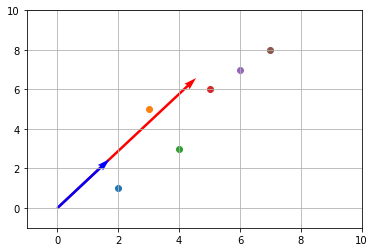

In [142]:
x_position = [0, 0]   # vector x and b start at origin
y_position = [0, 0]    

x_direction =[u[0], lamda_u[0]] # List of Endpoint of Arrow for x 
y_direction = [u[1], lamda_u[1]]

plt.scatter(x1[0],x1[1])
plt.scatter(x2[0],x2[1])
plt.scatter(x3[0],x3[1])
plt.scatter(x4[0],x4[1])
plt.scatter(x5[0],x5[1])
plt.scatter(x6[0],x6[1])

# np.fliplr(cov)

plt.quiver(x_position, y_position, x_direction, y_direction, angles='xy',scale_units='xy', scale=1,color=['r','b', 'y'])
plt.xlim(-1,10)   #  is used to get or set the 'x-limits' of the current axes
plt.ylim(-1,10)
plt.grid(b=True, which='major') #<-- plot grid lines

print('u = ', u);    # eigen vector
print('lamda * u = ', lamda_u)   # eigen value